# It's extremely simple!

Loading MNIST

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Show digit

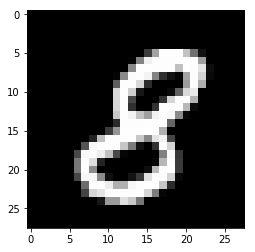

In [4]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train.images[5].reshape((28,28)), cmap="gray")
plt.show()

Show label

In [5]:
print(mnist.train.labels[200])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Build a neural network of size $(784,30,30,10)$:

In [6]:
tf.reset_default_graph() # first reset computational graph
x = tf.placeholder(tf.float32, [None, 784], name = "data") #inputs
#first layer
with tf.name_scope("layer1"):
    W1 = tf.Variable(tf.truncated_normal((784, 30) , stddev = 2/np.sqrt(784)), name = "W1")
    b1 = tf.Variable(tf.zeros([30]), name = "b1")
    hidden1 = tf.matmul(x,W1)+b1
with tf.name_scope("ReLU1"):
    hidden1ReLU = tf.nn.relu(hidden1)
#second layer
with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.truncated_normal((30, 30), stddev = 2/np.sqrt(30)), name = "W2")
    b2 = tf.Variable(tf.zeros([30]), name = "b2")
    hidden2 = tf.matmul(hidden1ReLU,W2)+b2
with tf.name_scope("ReLU2"):
    hidden2ReLU = tf.nn.relu(hidden2)
#third layer
with tf.name_scope("output_layer"):
    W3 = tf.Variable(tf.truncated_normal((30, 10), stddev = 2/np.sqrt(30)), name = "W3")
    b3 = tf.Variable(tf.zeros([10]), name = "b3")
    Phi = tf.matmul(hidden2ReLU,W3)+b3

In [7]:
import compgraph as cg
cg.show_graph()

Define Loss function and Optimization method

In [8]:
z = tf.placeholder(tf.float32, [None, 10]) #placeholder for training data
loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=z, logits=Phi))#define loss function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)#define optimization method

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Run the model

In [9]:
sess = tf.InteractiveSession() #start interactive session
tf.global_variables_initializer().run() #initialize variables
for _ in range(5000): #10000 steps with batchsize 100
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, z: batch_ys})
correct_prediction = tf.equal(tf.argmax(Phi,1), tf.argmax(z,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, z: mnist.test.labels}))
sess.close() #close interactive session

0.9307
